# Задание 06

### 1. Энтропия (3 балла)
Вычислите энтропию и индекс Джини случайной величины $X$, если 

* величина $X$ равновероятно принимает $k\ge2$  значений;

* величина $X$ равномерно распределена на отрезке $[0; a]$;

* величина $X$ нормально распределена $\mathcal N (0, \sigma^2)$;

###  2. Критерии информативности (2 балла)
На лекциях говорилось, что критерий информативности для набора объ-
ектов R вычисляется на основе того, насколько хорошо их целевые переменные предсказываются константой (при оптимальном выборе этой константы):
$$
H(R)=\frac{1}{|R|}\sum_{(x_i,y_i)\in R} L(y_i,c),
$$
где $L(y, c)$ - некоторая функция потерь и
$$
c=argmin_cH(R).
$$
 
Соответственно, чтобы получить вид критерия при конкретной функции потерь, необходимо аналитически найти оптимальное
значение константы и подставить его в формулу для H(R).
Выведите критерии информативности для следующих функций потерь:

* $L(y,c)=\sum_{k=1}^K (c_k-[y=k])^2$,

* $L(y,c)=-\sum_{k=1}^K [y=k] \log c_k$. 

### 3.  Переобучение и неустойчивость решающих деревьев (3 балла)
* сгенерируйте случайную выборку $X=\{x_1,x_2\}$ с количеством объектов $N=100$: $x_1,x_2$ из нормального распределения, целевая переменная $y=\sqrt{x_1^2+x_2^2}$;

* изобразите выборку на плоскости, по осям - значения признаков $x_1$, $x_2$, цвет отражает значение целевой переменной;

* постройте решающее дерево для задачи регрессии с параметрами по умолчанию;

* с помощью get_grid постройте разделяющую границу регрессора;

* постройте деревья-регрессоры  для разных значений глубины дерева и минимального числа объектов в листе;

* изобразите на одном графике  соответствующие разделяющие границы регрессоров (например, с помощью plt.subplot2grid);

* Решающие деревья — это алгоритмы, неустойчивые к изменениям обучающей выборки, т.е. при малейших её изменениях итоговый классификатор может радикально измениться. Посмотрите, как будет меняться структура дерева при обучении на разных 90%-х подвыборках (постройте три регрессора и соответствующие разделяющие границы регрессоров)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
n_features = 2
n_objects = 100
X = np.random.normal(size=(n_objects, n_features))
Y = (X[:, 0] ** 2 + X[:, 1] ** 2) ** 0.5

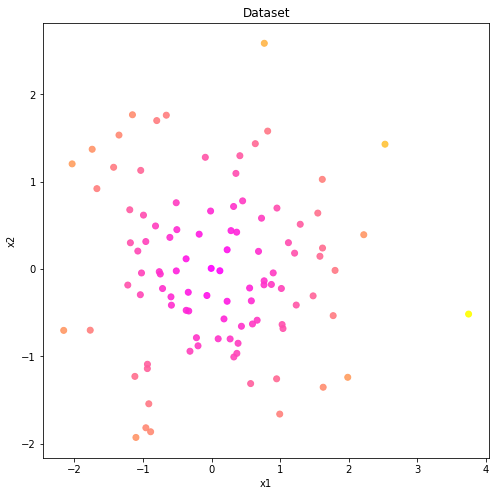

In [3]:
plt.figure(figsize=(8, 8))
plt.scatter(X[:,0],X[:,1], c= Y , alpha = 0.9, cmap='spring')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Dataset')
plt.show()

In [5]:
from sklearn import tree
tree_model=tree.DecisionTreeRegressor()
tree_model.fit(X, Y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [6]:
def get_grid(data): 
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), # создаем координатную матрицу c шагом 0.01
                         np.arange(y_min, y_max, 0.01))

Text(0, 0.5, 'x2')

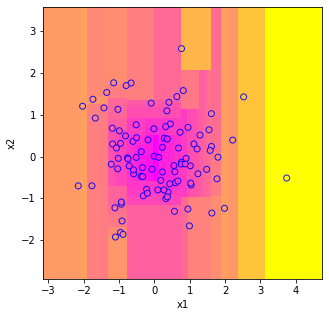

In [7]:
xx, yy = get_grid(X)
predicted = tree_model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.figure(figsize=(5, 5))
plt.pcolormesh(xx, yy, predicted, cmap='spring')
plt.scatter(X[:,0],X[:,1], c = Y, alpha = 0.9 , cmap= 'spring', edgecolor='b')
plt.xlabel('x1')
plt.ylabel('x2')

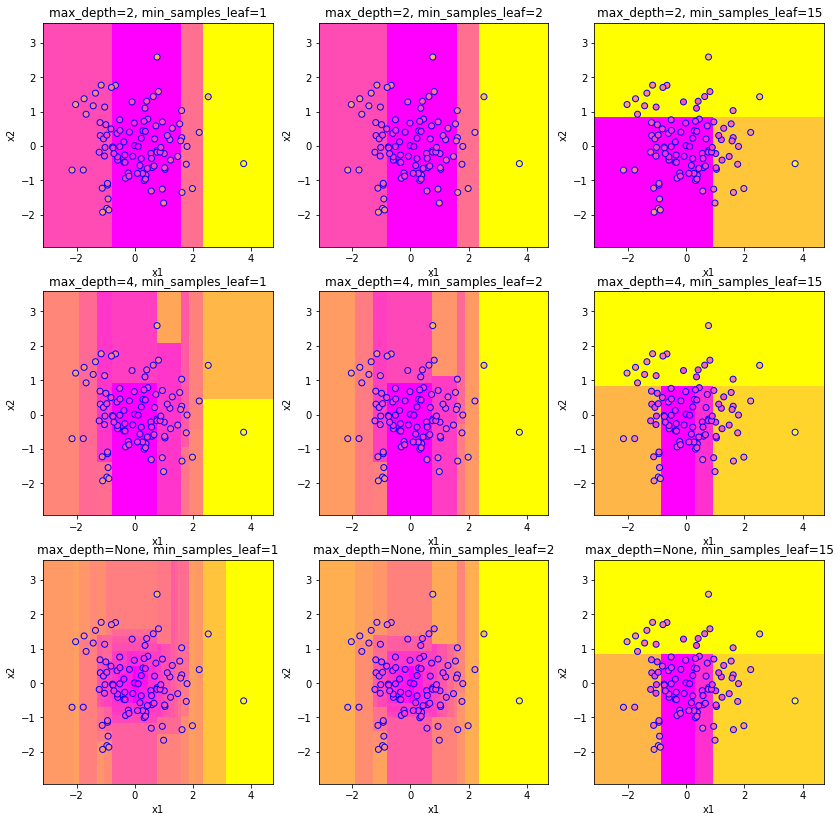

In [8]:
max_depth=[2, 4, None]
min_samples_leaf=[1,2,15]


plt.figure(figsize=(14, 14))
for i, max_depth in enumerate([2, 4, None]):
    for j, min_samples_leaf in enumerate([1, 2, 15]):
        tree_model = tree.DecisionTreeRegressor(max_depth=max_depth, min_samples_leaf=min_samples_leaf)
        tree_model.fit(X, Y)
        xx, yy = get_grid(X)
        predicted = tree_model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
        
        plt.subplot2grid((3, 3), (i, j))
        plt.pcolormesh(xx, yy, predicted, cmap='spring')
        plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='spring', edgecolor= 'b')
        plt.xlabel('x1')
        plt.ylabel('x2')
        plt.title('max_depth=' + str(max_depth) + ', min_samples_leaf=' + str(min_samples_leaf))


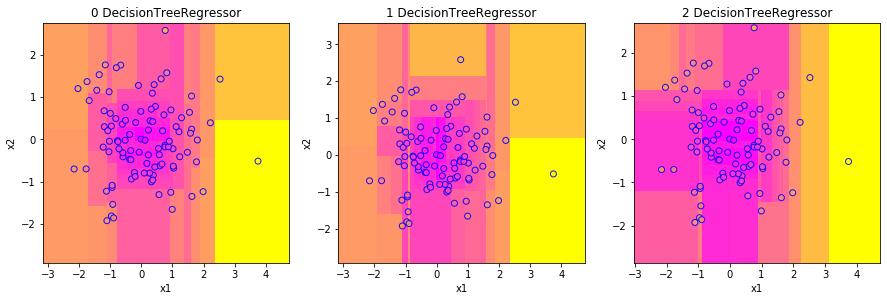

In [18]:
fig = plt.figure(figsize=(15,15))

for i in range(3):
    random_ind = np.random.randint(0,len(X),size= 90)
    X1 = X[random_ind]
    Y1 = Y[random_ind]
    tree_model = tree.DecisionTreeRegressor()
    tree_model.fit(X1,Y1)
    xx, yy = get_grid(X1)
    predicted = tree_model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    ax = plt.subplot2grid((3, 3), (1, i))
    ax.pcolormesh(xx, yy, predicted, cmap='spring')
    plt.scatter(X[:,0],X[:,1], c= Y, alpha = 0.9, edgecolor='b', cmap='spring')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(str(i)+ ' DecisionTreeRegressor')
    del(random_ind)
    
    

### 4. Решающее дерево для регрессии на данных (2 балла)
* разделите выборку на обучающую и тестовую в соотношении $7:3$;
* с помощью GridSearch подберите наилучшие параметры для решающего дерева регрессора (выведите параметры наилучшего регрессора). 

In [20]:
from sklearn.datasets import load_boston
boston = load_boston()

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [28]:
X = boston.data
y = boston.target

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.3)
tree_model = tree.DecisionTreeRegressor()
tree_model.fit(X_train,y_train)
tree_model.score(X_test,y_test)

0.7094253344942738

scoring='r2'

max_features=[None, 'log2', 'sqrt']

max_depth =[2, 4, 6, 8, 10, 20, 50]

min_samples_leaf=np.arange(1,20)

In [29]:
param_grid = {"max_features" : [None, 'log2', 'sqrt'],
              "max_depth" : [2, 4, 6, 8, 10, 20, 50],
              "min_samples_leaf" : np.arange(1,20) }
optimizer = GridSearchCV(tree_model, param_grid, scoring='r2')
optimizer.fit(X_train, y_train)
best_par= optimizer.best_params_
best_par

{'max_depth': 6, 'max_features': None, 'min_samples_leaf': 4}

In [30]:
tree_model=tree.DecisionTreeRegressor (max_depth= best_par['max_depth'],
                                       max_features= best_par['max_features'], 
                                       min_samples_leaf= best_par['min_samples_leaf'])
tree_model.fit(X_train,y_train)
tree_model.score(X_test,y_test)

0.798918488036303